<Figure size 576x432 with 0 Axes>

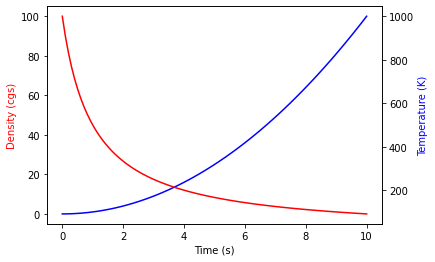

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(t, t**2, 'b-')
ax2.plot(t, 1000 / (t + 1), 'r-')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')
plt.show()

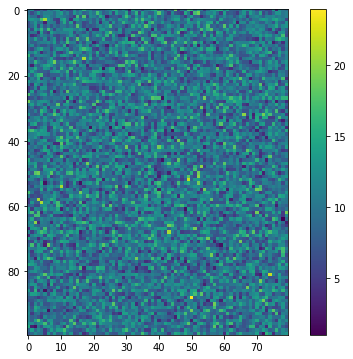

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
image = np.random.poisson(10., (100, 80))
i = ax.imshow(image, interpolation='nearest')
fig.colorbar(i)# note that colorbar is a method of the figure, not the axe
plt.show()

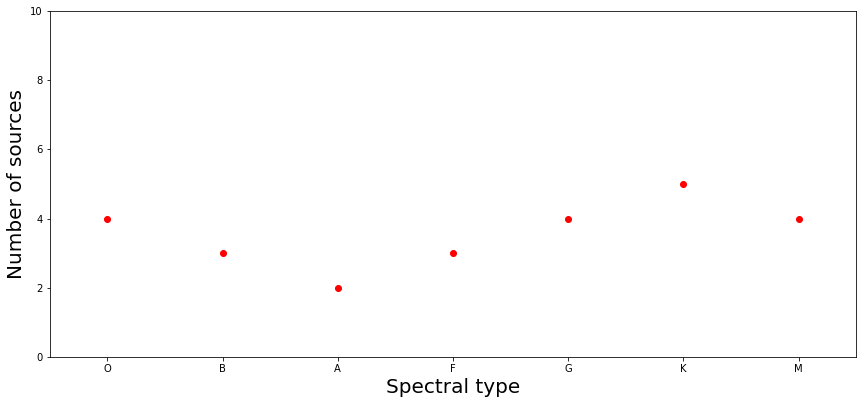

In [2]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Define spectral types
spectral_id = [1, 2, 3, 4, 5, 6, 7]
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
# Plot the data
ax.plot(spectral_id, [4, 3, 2, 3, 4, 5, 4], 'ro')
# Set the limits
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0., 10.)
# Set the custom ticks on the x-axis
ax.set_xticks(spectral_id)
ax.set_xticklabels(spectral_types)
# Set the axis labels
ax.set_xlabel("Spectral type", fontsize=20)
ax.set_ylabel("Number of sources", fontsize=20)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

plt.show()

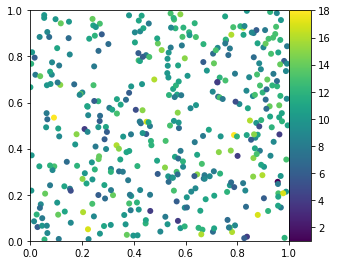

In [4]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])
x = np.random.random(400)
y = np.random.random(400)
c = np.random.poisson(10., 400)
s = ax.scatter(x, y, c=c, edgecolor='none')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
fig.colorbar(s, cax=colorbar_ax)
plt.show()

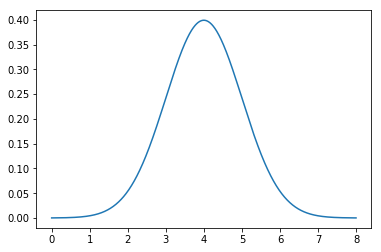

In [5]:
import numpy as np
from scipy import stats
gaussian = stats.norm(loc=4.0, scale=1.0)
x = np.linspace(0.0, 8.0, 1000)
y = gaussian.pdf(x)
plt.plot(x,y)
plt.show()

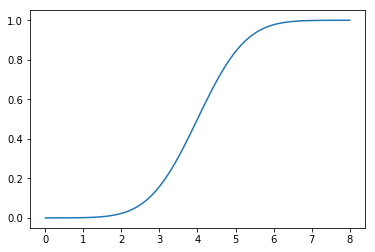

In [6]:
z = gaussian.cdf(x)
plt.plot(x,z)
plt.show()

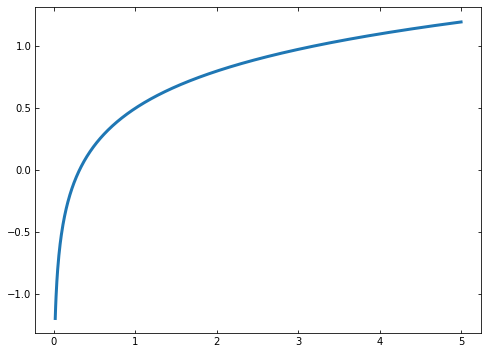

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
x=np.linspace(0.02, 5,1000)
y=np.log10(x*np.pi)
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='y',which='both',direction='in',labelleft='on',labelright='off')
ax.tick_params(axis='x',which='both',direction='in',labelbottom='on',labeltop='off')
plt.plot(x,y, linewidth=3)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

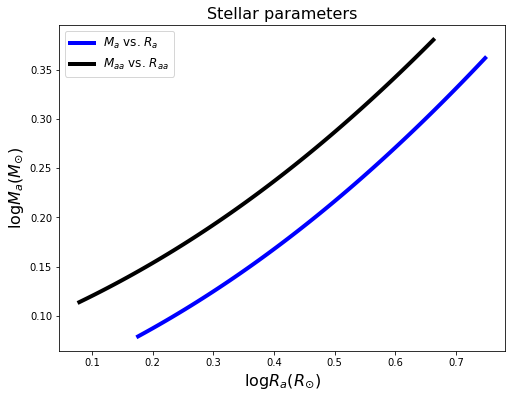

In [12]:
Ma=np.linspace(1.2, 2.3, 100) # in solar unit
Ra=np.linspace(1.5, 5.6, 100)
Maa=np.linspace(1.3, 2.4, 100) # in solar unit
Raa=np.linspace(1.2, 4.6, 100)
# solar mass and its radius
Msun=1.99e+30
Rsun=6.96e+8
# Our Job:
Mb=Ma*Msun
# in kg
Rb=Ra*Rsun
# in meter
# plot
plt.figure(figsize=(8,6))
plt.plot(np.log10(Ra), np.log10(Ma), 'b', label='$M_{a}$ vs. $R_{a}$', linewidth=4)
plt.plot(np.log10(Raa), np.log10(Maa), 'k', label='$M_{aa}$ vs. $R_{aa}$', linewidth=4)
#plt.xlim()
#plt.xlim()
#plt.ylim()
plt.xlabel('$\log{R}_{a} (R_{\odot})$', fontsize=16)
plt.ylabel('$\log{M}_{a} (M_{\odot})$', fontsize=16)
#plt.xscale('log')
#plt.yscale('log')
#plt.grid()
plt.title('Stellar parameters', fontsize=16)
plt.legend(loc=2, fontsize=12)
plt.savefig('Fig_Stellar.png')
# eps, png,pdf, ps, ...
plt.show()

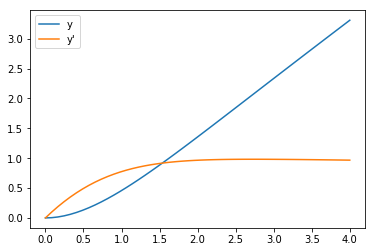

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
start = time.clock()
def F(y, x):
    F1 = y[1]
    F2 = y[2]
    F3 = -y[0]*y[2] - (1 - y[1]*y[1])
    return [F1,F2,F3]
def init(u):
       return np.array([0,0,u])
X = np.linspace(0, 4, 50)
niter = 100
u = 0
tol = 0.1
ustep = 0.01
for i in range(niter):
    u += ustep
    Y = odeint(F, init(u), X)
#print Y[-1,1]
if abs(Y[len(Y)-1,1] - 1) < tol:
    u = 0
tol = 0.1
ustep = 0.01
for i in range(niter):
    u += ustep
    Y = odeint(F, init(u), X)
    if abs(Y[len(Y)-1,1] - 1) < tol:
        break
end = time.clock()
plt.plot(X, Y[:,0], label='y')
plt.plot(X, Y[:,1], label='y\'')
plt.legend()
plt.show()

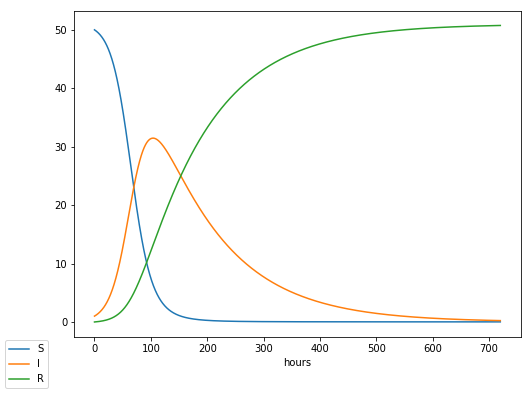

In [47]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
# Time unit: 1 h
beta = 10./(40*8*24)
gamma = 3./(15*24)
dt = 0.1
# 6 min
D = 30
# Simulate for D days
N_t = int(D*24/dt)
# Corresponding no of hours
t=linspace(0, N_t*dt, N_t+1)
S=zeros(N_t+1)
I=zeros(N_t+1)
R=zeros(N_t+1)
S[0] = 50
I[0] = 1
R[0] = 0
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]
fig = plt.figure(figsize=(8,6))
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'lower left')
plt.xlabel('hours')
plt.show()
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
